In [1]:
import warnings
warnings.filterwarnings("ignore")

from datetime import date, timedelta
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import os
import gc

### Fetching Data

#### Downloading Data (using Wget)

In [2]:
file_path="favorita-grocery-sales-forecasting.zip"

if not os.path.exists(file_path):
    !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7391/44328/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592756747&Signature=MnbqoPZxCZHGIlDray3VOxdpmBUKBR2X1Ebntkda%2FAKvc%2F3LecqEo1Q%2BcK7i37rx91XM6u1i6LnANeUoQAt%2BzG66TBvzxxo4d19aj9hP3OqZb48XjFUCW0hR3I%2FxVeIFe%2BvHIDRKUpIZKtJG561MkydHnPQIwtDE8V%2F8tKtPB64CaeJTtQZ5Y%2B8bbbJa0lNK1UjpXsnoWKxegHok8p6ljLAwXI77Pc9j0hgswG9jJ8l2k6%2FDVYw0DXkwXpi9gX4wU8dprz0flfDqhcOU24kYt5G4Y8LMHuBPJS0TZJ5cxPva8OGR1USU3Z6TvZaGXy1hjCn2cnw3IQBe5xkX%2BfyOUA%3D%3D&response-content-disposition=attachment%3B+filename%3Dfavorita-grocery-sales-forecasting.zip" -c -O 'favorita-grocery-sales-forecasting.zip'
else:
    print("File Already Present")

--2020-06-21 16:06:53--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7391/44328/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592756747&Signature=MnbqoPZxCZHGIlDray3VOxdpmBUKBR2X1Ebntkda%2FAKvc%2F3LecqEo1Q%2BcK7i37rx91XM6u1i6LnANeUoQAt%2BzG66TBvzxxo4d19aj9hP3OqZb48XjFUCW0hR3I%2FxVeIFe%2BvHIDRKUpIZKtJG561MkydHnPQIwtDE8V%2F8tKtPB64CaeJTtQZ5Y%2B8bbbJa0lNK1UjpXsnoWKxegHok8p6ljLAwXI77Pc9j0hgswG9jJ8l2k6%2FDVYw0DXkwXpi9gX4wU8dprz0flfDqhcOU24kYt5G4Y8LMHuBPJS0TZJ5cxPva8OGR1USU3Z6TvZaGXy1hjCn2cnw3IQBe5xkX%2BfyOUA%3D%3D&response-content-disposition=attachment%3B+filename%3Dfavorita-grocery-sales-forecasting.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480014675 (458M) [application/zip]
Saving to: ‘favorita-grocery-sales-forec

#### Extracting Zip Files

In [3]:
if os.path.exists('favorita-grocery-sales-forecasting.zip'):
    !unzip 'favorita-grocery-sales-forecasting.zip'
    print("File unzipped Successfully")
else:
    print("File Not Present to unzip")

Archive:  favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     
File unzipped Successfully


In [4]:
#installing 7zip for extracting .7z files
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [5]:
for file in os.listdir():
    if file[-3:]=='.7z':
        if os.path.exists(file[:-3]):
            print("="*50)
            print("'{}'Extracted File is Already Present".format(file[:-3]))
            
        elif file=='train.csv.7z':
            !p7zip -d 'train.csv.7z'
            print("="*50)
            print("'{}' File Extracted Successfully".format(file))

        elif file=='stores.csv.7z':
            !p7zip -d 'stores.csv.7z'
            print("="*50)
            print("'{}' File Extracted Successfully".format(file))

        elif file=='items.csv.7z':
            !p7zip -d 'items.csv.7z'
            print("="*50)
            print("'{}' File Extracted Successfully".format(file))

        elif file=='test.csv.7z':
            !p7zip -d 'test.csv.7z'
            print("="*50)
            print("'{}' File Extracted Successfully".format(file))

        print("="*50)


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 219499 bytes (215 KiB)

Extracting archive: transactions.csv.7z
--
Path = transactions.csv.7z
Type = 7z
Physical Size = 219499
Headers Size = 138
Method = LZMA2:1536k
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       1552637
Compressed: 219499
'transactions.csv.7z' File Extracted Successfully

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4885065 bytes (4771 KiB)

Extracting archive: test.csv.7z
--
Path = test.csv.7z
Type = 7z
Physical Size = 4885065
Headers Size = 1

### Test Data

In [6]:
#Reading test.csv
df_test = pd.read_csv("test.csv", dtype={'onpromotion': int},parse_dates=["date"] )
print("Shape of Test Dataframe --> ",df_test.shape)
df_test.head()

Shape of Test Dataframe -->  (3370464, 5)


,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,0
1,125497041,2017-08-16,1,99197,0
2,125497042,2017-08-16,1,103501,0
3,125497043,2017-08-16,1,103520,0
4,125497044,2017-08-16,1,103665,0


###Items Data

In [7]:
#Reading items.csv
items = pd.read_csv("items.csv",)
print("Shape of Items Dataframe --> ",items.shape)
items.head()

Shape of Items Dataframe -->  (4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [8]:
#Setting item_nbr as the index of the dataframe
items = items.set_index("item_nbr") 
items.head()

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,0
99197,GROCERY I,1067,0
103501,CLEANING,3008,0
103520,GROCERY I,1028,0
103665,BREAD/BAKERY,2712,1


#### Label Encoding (item family)


In [9]:
#initializing label encoder
encoder = LabelEncoder()
#transforming item family column
items['family'] = encoder.fit_transform(items['family'].values)
items.head()

,family,class,perishable
item_nbr,,,
96995,12,1093,0
99197,12,1067,0
103501,7,3008,0
103520,12,1028,0
103665,5,2712,1


### Stores Data

In [10]:
#Reading store.csv
stores = pd.read_csv("stores.csv")
print("Shape of Stores Dataframe --> ",stores.shape)
stores.head()


Shape of Stores Dataframe -->  (54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
# Setting store_nbr as the index of the dataframe
stores = stores.set_index("store_nbr")
stores.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


#### Label Encoding on store state, city and type


In [12]:
#initializing label encoder
encoder = LabelEncoder()
#transforming state column
stores['state'] = encoder.fit_transform(stores['state'].values)
#transforming city column
stores['city'] = encoder.fit_transform(stores['city'].values)
#transforming type column
stores['type'] = encoder.fit_transform(stores['type'].values)

stores.head()

,city,state,type,cluster
store_nbr,,,,
1,18,12,3,13
2,18,12,3,13
3,18,12,3,8
4,18,12,3,9
5,21,14,3,4


### Train Data

In [13]:
#Skipping rows from 1 to 101688780‬ i.e. reading 2017 data only.
df_train = pd.read_csv('train.csv', dtype={'onpromotion': int}, parse_dates=["date"], skiprows=range(1,101688780))
print("Shape of Train Dataframe --> ",df_train.shape)
df_train.head()

Shape of Train Dataframe -->  (23808261, 6)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,101688779,2017-01-01,25,99197,1.0,0
1,101688780,2017-01-01,25,103665,7.0,0
2,101688781,2017-01-01,25,105574,1.0,0
3,101688782,2017-01-01,25,105857,4.0,0
4,101688783,2017-01-01,25,106716,2.0,0


In [14]:
#Dropping Id Column
df_train=df_train.drop('id',axis=1)
df_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-01-01,25,99197,1.0,0
1,2017-01-01,25,103665,7.0,0
2,2017-01-01,25,105574,1.0,0
3,2017-01-01,25,105857,4.0,0
4,2017-01-01,25,106716,2.0,0


#### Plotting Histogram of Target variable i.e. Unit_Sales. 

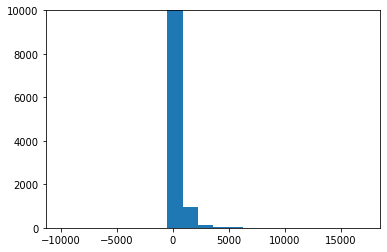

In [15]:
plt.hist(df_train.unit_sales,bins=20)
plt.ylim(0,10000)
plt.show()

##### Observations


*   Histogram of Unit_sales variable shows that it isn’t distributed normally.
*   There’s a whole pile of very small values at one end, and the larger values aren’t even clearly visible.

*  The above plot shows that the variable 'Unit_sales' is not following normal distribution and highly right skewed.








##### Reference -> [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)
1. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" as possible and, thus, increase the validity of the associated statistical analyses. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.
2. Since the log transformation can only be used for positive outcomes, it is common practice to add a small positive constant, to all observations before applying this transformation.

#### Log Transformation (Target Variable)

Transforming target variable -> unit_sales(y) By adding 1 and taking log i.e. log(y+1)
Taking the log of unit_sales plus a small value (i.e. 1), because log of zero is undefined. 

In [16]:
transformed=[]
for value in tqdm(df_train.unit_sales):
    if float(value) > 0:
        value=np.log1p(float(value))
    else:
        value=0
    transformed.append(value)

df_train['unit_sales']=transformed  
del transformed

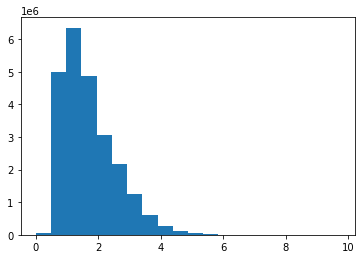

In [17]:
plt.hist(df_train.unit_sales,bins=20)
plt.show()

Transformed the target variable so that it can  better fit the assumptions underlying regression.

The log transformation made highly skewed distributions less skewed.

### Data Wrangling

#### Data based on store_nbr and item_nbr pairs

##### Promotion Data

In [18]:
#Setting store_nbr, item_nbr and date as the indices.
promo_2017_train = df_train.set_index(["store_nbr", "item_nbr", "date"])

#Using promotions column only and unstacking the dates
promo_2017_train= promo_2017_train[["onpromotion"]].unstack(level=-1)

#Filling the missing values with 0.
promo_2017_train = promo_2017_train.fillna(0)

promo_2017_train.head()

onpromotion             ...                      
date                2017-01-01 2017-01-02  ... 2017-08-14 2017-08-15
store_nbr item_nbr                         ...                      
1         96995            0.0        0.0  ...        0.0        0.0
          99197            0.0        0.0  ...        0.0        0.0
          103520           0.0        0.0  ...        0.0        0.0
          103665           0.0        0.0  ...        0.0        0.0
          105574           0.0        0.0  ...        0.0        0.0

[5 rows x 227 columns]

In [19]:
# Deleting 1st row
promo_2017_train.columns = promo_2017_train.columns.get_level_values(1)
promo_2017_train.head()

date                2017-01-01  2017-01-02  ...  2017-08-14  2017-08-15
store_nbr item_nbr                          ...                        
1         96995            0.0         0.0  ...         0.0         0.0
          99197            0.0         0.0  ...         0.0         0.0
          103520           0.0         0.0  ...         0.0         0.0
          103665           0.0         0.0  ...         0.0         0.0
          105574           0.0         0.0  ...         0.0         0.0

[5 rows x 227 columns]

In [20]:
#Setting store_nbr, item_nbr and date as the indices of the dataframe
promo_2017_test = df_test.set_index(['store_nbr', 'item_nbr', 'date'])

#Using promotions column only and unstacking the dates
promo_2017_test = promo_2017_test[["onpromotion"]].unstack(level=-1).fillna(0)

#Filling the missing information with 0.
promo_2017_test = promo_2017_test.fillna(0)

# Deleting 1st row
promo_2017_test.columns = promo_2017_test.columns.get_level_values(1)
promo_2017_test.head()


date                2017-08-16  2017-08-17  ...  2017-08-30  2017-08-31
store_nbr item_nbr                          ...                        
1         96995              0           0  ...           0           0
          99197              0           0  ...           0           0
          103501             0           0  ...           0           0
          103520             0           0  ...           0           0
          103665             0           0  ...           0           0

[5 rows x 16 columns]

In [21]:
#Removing Items from test dataset that are not in train dataset 
#Adding Items that are not in the test dataset and filling values with 0

#Re-indexing with train dataframe index. By default values in the new index that do not have corresponding records in the dataframe are assigned NaN
promo_2017_test = promo_2017_test.reindex(promo_2017_train.index)

#Filling the missing information with 0.
promo_2017_test = promo_2017_test.fillna(0)

promo_2017_test.head()

date                2017-08-16  2017-08-17  ...  2017-08-30  2017-08-31
store_nbr item_nbr                          ...                        
1         96995            0.0         0.0  ...         0.0         0.0
          99197            0.0         0.0  ...         0.0         0.0
          103520           0.0         0.0  ...         0.0         0.0
          103665           0.0         0.0  ...         0.0         0.0
          105574           0.0         0.0  ...         0.0         0.0

[5 rows x 16 columns]

In [22]:
#Concatenating train and test datasets
promo_2017 = pd.concat([promo_2017_train, promo_2017_test], axis=1)
promo_2017.head()

date                2017-01-01  2017-01-02  ...  2017-08-30  2017-08-31
store_nbr item_nbr                          ...                        
1         96995            0.0         0.0  ...         0.0         0.0
          99197            0.0         0.0  ...         0.0         0.0
          103520           0.0         0.0  ...         0.0         0.0
          103665           0.0         0.0  ...         0.0         0.0
          105574           0.0         0.0  ...         0.0         0.0

[5 rows x 243 columns]

In [23]:
# Deleting unneccesary variables
del promo_2017_test, promo_2017_train

##### Sales Data

In [24]:
#Setting store_nbr, item_nbr and date as the indices.
sales_2017 = df_train.set_index(["store_nbr", "item_nbr", "date"])

#Using unit_sales column only and unstacking the dates
sales_2017 = sales_2017[["unit_sales"]].unstack(level=-1)

#Filling the missing values with 0's.
sales_2017 = sales_2017.fillna(0)
# Deleting 1st row
sales_2017.columns = sales_2017.columns.get_level_values(1)

sales_2017.head()


date                2017-01-01  2017-01-02  ...  2017-08-14  2017-08-15
store_nbr item_nbr                          ...                        
1         96995            0.0    0.000000  ...    0.000000    0.000000
          99197            0.0    0.000000  ...    0.000000    0.000000
          103520           0.0    0.693147  ...    0.000000    0.000000
          103665           0.0    0.000000  ...    0.693147    0.693147
          105574           0.0    0.000000  ...    1.386294    1.609438

[5 rows x 227 columns]

#### Data based on item_nbr.

##### Promotion Data

In [25]:
#Grouping promotions by item no. over time and filtering only that columns that are in promo_2017 Dataframe.
promo_item_2017 = promo_2017.groupby('item_nbr')[promo_2017.columns].sum()
promo_item_2017.head()

date,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-06,2017-02-07,2017-02-08,2017-02-09,...,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31
item_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
103520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
103665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0


##### Sales Data

In [26]:
#Grouping sales by item no. through time and keeping only that columns that are present in sales dataframe
sales_item_2017 = sales_2017.groupby('item_nbr')[sales_2017.columns].sum()
sales_item_2017

date,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-06,2017-02-07,2017-02-08,2017-02-09,...,2017-07-07,2017-07-08,2017-07-09,2017-07-10,2017-07-11,2017-07-12,2017-07-13,2017-07-14,2017-07-15,2017-07-16,2017-07-17,2017-07-18,2017-07-19,2017-07-20,2017-07-21,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15
item_nbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.658693,8.723231,9.128696,4.564348,5.545177,6.068426,5.545177,6.931472,9.351840,7.336937,3.583519,6.761573,8.030084,6.356108,4.852030,7.336937,6.761573,6.643790,6.761573,6.356108,6.356108,7.336937,9.469623,5.950643,6.173786,5.950643,9.821844,9.534161,6.356108,7.336937,5.662960,7.454720,2.484907,5.950643,5.545177,8.841014,7.742402,4.969813,7.167038,7.742402
99197,0.693147,17.422746,16.604036,20.569303,16.203025,16.278613,14.775909,17.317386,14.986630,15.833927,15.951710,6.761573,14.293482,11.926359,15.825731,16.818830,14.881269,11.079061,14.151754,17.289215,15.931091,11.010068,6.356108,7.649693,13.523146,5.375278,4.969813,5.257495,3.871201,1.386294,4.276666,1.791759,2.197225,2.079442,0.000000,1.386294,0.693147,0.693147,1.386294,1.791759,...,15.951710,12.955978,16.822064,12.712215,12.984149,12.529894,9.798127,16.834959,17.820431,12.635254,21.573849,10.227309,18.940069,12.999897,18.164683,9.416378,15.890269,14.593587,11.325921,12.214041,10.044987,13.746289,8.147867,9.534161,7.677864,5.257495,3.583519,2.079442,1.386294,3.178054,3.178054,4.969813,3.178054,4.969813,2.079442,2.197225,1.386294,2.079442,0.000000,0.000000
103501,0.000000,55.868320,54.627085,42.810313,39.555298,35.717635,47.208504,47.542538,40.189274,39.200893,42.293954,30.419318,38.025918,47.754808,47.340190,34.580801,39.024766,36.030619,30.807906,31.939143,47.582552,45.467144,38.906258,40.548321,35.780320,33.771725,32.762725,49.361495,45.503756,41.835181,43.802522,46.101695,43.106860,37.214161,51.808490,48.945795,42.174649,38.635681,33.966697,32.131019,...,30.224574,41.855801,44.100480,40.829176,38.149053,30.873573,29.474856,30.630039,42.327658,39.961190,38.351096,39.969227,36.780108,31.797644,29.056968,36.082262,47.370206,43.221471,34.026782,28.355624,29.426066,36.074726,43.624993,48.269842,42.539276,47.547413,41.086834,36.374643,33.346057,40.030669,38.578235,33.531460,35.296421,35.584104,26.270815,32.776619,34.416498,36.546914,34.773173,35.512841
103520,0.000000,38.875486,35.822995,34.979211,42.252967,51.397412,49.505990,33.846832,33.336007,31.741073,33.816061,35.948747,38.145971,44.153184,30.050220,31.574500,34.683561,32.486337,32.316438,36.957747,47.076410,32.380976,24.143497,27.650055,28.469182,36.252177,43.549649,41.534746,33.653942,25.955876,31.456717,40.882192,31.452263,39.750767,38.587804,31.846434,25.801725,28.132481,32.527159,37.460604,...,44.792362,46.504559,43.950660,38.940025,36.690496,39.126800,31.448937,42.495373,50.935376,36.855941,33.420748,30.735399,44.266741,37.761354,50.100501,49.240780,41.534746,39.178916,42.442840,40.489378,45.190111,52.024167,49.228358,32.203109,35.291967,51.361044,33.589403,43.176097,47.286190,58.097702,

#### Data based on item_class and store_nbr pairs.

In [27]:
#Removing items that are not present in year 2017.

#Re-indexing by using index of sales_2017 dataframe.
items = items.reindex(sales_2017.index.get_level_values(1))

#Removing stores that are not present in year 2017.

#Re-indexing by using index of sales_2017 dataframe.
stores = stores.reindex(sales_2017.index.get_level_values(0))


##### Promotion Data

In [28]:
#Fetching promotion data with new sequential index
store_class_promo_2017 = promo_2017.reset_index()

#Adding class column
store_class_promo_2017['class'] = items['class'].values

#Grouping promotions by item class and store no. and filtering on;y that columns that are in promo_2017 Dataframe
store_class_promo_2017 = store_class_promo_2017.groupby(['class', 'store_nbr'])[promo_2017.columns].sum()
store_class_promo_2017.head()

date             2017-01-01  2017-01-02  ...  2017-08-30  2017-08-31
class store_nbr                          ...                        
1002  1                 0.0         0.0  ...         1.0         1.0
      2                 0.0         0.0  ...         1.0         1.0
      3                 0.0         0.0  ...         1.0         1.0
      4                 0.0         0.0  ...         1.0         2.0
      5                 0.0         0.0  ...         1.0         0.0

[5 rows x 243 columns]

##### Sales Data

In [29]:
#Fetching sales data with new sequential index
store_class_sales_2017 = sales_2017.reset_index()

#Adding class column
store_class_sales_2017['class'] = items['class'].values 

# Storing Item class and store_nbr pairs used for indexing later
store_class_index = store_class_sales_2017[['class', 'store_nbr']]

#Grouping sales by item class and store no. and keeping only that columns present in sales dataframe
store_class_sales_2017 = store_class_sales_2017.groupby(['class', 'store_nbr'])[sales_2017.columns].sum()
store_class_sales_2017

date             2017-01-01  2017-01-02  ...  2017-08-14  2017-08-15
class store_nbr                          ...                        
1002  1                 0.0    6.291569  ...   18.639141   10.450452
      2                 0.0   27.836761  ...   21.576931   24.121024
      3                 0.0   42.484074  ...   33.608285   24.929109
      4                 0.0   28.353452  ...   16.267563   16.267563
      5                 0.0   19.157935  ...   11.192390   11.443704
...                     ...         ...  ...         ...         ...
7780  49                0.0   14.139332  ...    4.718499    5.192957
      50                0.0   14.370443  ...    4.276666    1.386294
      51                0.0    4.564348  ...    0.000000    3.583519
      52                0.0    0.000000  ...    5.886104    3.688879
      53                0.0    6.579251  ...    4.969813    8.147867

[15826 rows x 227 columns]

### Feature Engineering

#### Function for Filtering Data Between dates

In [30]:
 #Selects ony that dataframe columns which correspond to the "periods" days after the (Date-minus) day .
def get_timespan(df, Date, minus, periods, freq='D'):
    if minus!=0:
        return df[pd.date_range(Date - timedelta(days=minus), periods=periods, freq=freq)]
    else:
        return df[pd.date_range(Date , periods=periods, freq=freq)]



#### Function for Creating Promotional Features

In [31]:
def promo_features(promotions,Date,X):

    # Sum of Promotions with past data at different day intervals.
    for n_days in [14,60,140]:

        # Filtering promotions of items from (date-n_days) to (date).
        filtered_promo = get_timespan(promotions, Date, n_days, n_days)

        # Sum of Promotions for each item sold over date.
        X['%sdays_promo_sum (past)'%n_days]=filtered_promo.sum(axis=1).values

    # Sum of Promotions with future data at different day intervals.
    future_date = Date + timedelta(days=1)  #Shifting date ahead 
    for n_days in [3,7,14]:

        # Filtering promotions of items from (date) to (date+n_days)
        filtered_promo = get_timespan(promotions, future_date, 0, n_days)

        # Sum of Promotions for each item sold over date.
        X['%sdays_promo_sum (future)'%n_days]=filtered_promo.sum(axis=1).values


    # Promotion feature (i.e. if there is a promotion or not) for 16 days in past and future.
    for n_day in range(-16, 16):

        if n_day<0:
            flag='past'
        elif n_day > 0:
            flag='future'
        else:
            flag='present'

        #Promotion feature for each item sold on n_day.
        X["promo_day{} ({})".format(abs(n_day),flag)] = promotions[Date + timedelta(days=n_day)].values.astype(np.uint8)

    return X

#### Function for Creating Sales Features

In [32]:
def sales_features(sales,Date,X,past_week=False):

    name=''
    if past_week==True:
        name=" (past_week)"
        Date = Date - timedelta(days=7) # past_week_date is date - 7 days

    for n_days in [3, 7, 14, 30, 60, 140]:

        # Filtering sales of items n_days before t2017 to t2017
        filtered_sales = get_timespan(sales, Date, n_days, n_days)

        # mean of sales of each item over date
        X['%sdays_sale_mean' % n_days + name] = filtered_sales.mean(axis=1).values

        # exponentially weighted sum_of_sales of each item over date
        exp_weights = np.power(0.9, np.arange(n_days)[::-1])
        X['%sdays_weighted_sale' % n_days + name] = (filtered_sales * exp_weights ).sum(axis=1).values

        # mean of difference in sales of each item over date
        X['%sdays_sale_diff_mean' % n_days + name] = filtered_sales.diff(axis=1).mean(axis=1).values

        # median of sales of each item over date
        X['%sdays_sale_median' % n_days + name] = filtered_sales.median(axis=1).values

        # min. of sales of each item over date
        X['%sdays_min_sale' % n_days + name] = filtered_sales.min(axis=1).values

        # max. of sales of each item over date
        X['%sdays_max_sale' % n_days + name] = filtered_sales.max(axis=1).values

        # std. of sales of each item over date
        X['%sdays_sale_std' % n_days + name] = filtered_sales.std(axis=1).values


    # Sales on the nth day in past
    for n_day in range(1, 16):
        X['sales(past_day_%s)' % n_day] = get_timespan(sales, Date, n_day, 1).values.ravel()


    
    for n_day in range(7):
        # mean of sales every same day of week during 4 weeks before today
        X['dow%s_mean_sales(4weeks)' % n_day ] = get_timespan(sales, Date, 28-n_day, 4, freq='7D').mean(axis=1).values
        # mean of sales every same day of week during  20 weeks before today
        X['dow%s_mean_sales(20weeks)' % n_day] = get_timespan(sales, Date, 140-n_day, 20, freq='7D').mean(axis=1).values
    
    
    return X

#### Function for Creating Sales Features Depending on Promotion

In [33]:
def sales_promo_features(sales,promotions,Date,X):

    for n_days in [3, 7, 14, 30, 60, 140]:

        # Filtering sales of items from (date-n_days) to (date)
        filtered_sales = get_timespan(sales, Date, n_days, n_days)

        # Filtering promotion on items from (date-n_days) to (date)
        filtered_promo = get_timespan(promotions, Date, n_days, n_days)

        # mean_of_sales of each item sold on promotion over date
        sales_with_promo = filtered_sales * filtered_promo.replace(0, np.nan)           #replacing 0's with nan so that these values get ignored while calculating mean.
        X['%sdays_sale_mean(promo)' % n_days] =sales_with_promo.mean(axis=1).values     #pandas DataFrame.mean ignore nan values

        # exponentially weighted sum_of_sales of each item sold on promotion over date
        exp_weights = np.power(0.9, np.arange(n_days-1,-1,-1))                            
        X['%sdays_weighted_sale(promo)' % n_days] = (sales_with_promo * exp_weights).sum(axis=1).values   #Giving more weightage to recent dated sales and decreasing weight with date.
        
        # mean_of_sales of each item sold without promotion over date
        sales_without_promo = filtered_sales * (1 - filtered_promo).replace(0, np.nan)       #replacing 0's with nan so that these values get ignored while calculating mean.
        X['%sdays_sale_mean(no_promo)' % n_days] = sales_without_promo.mean(axis=1).values   #pandas DataFrame.mean ignore nan values

        # exponentially weighted sum_of_sales of each item sold without promotion over date
        X['%sdays_weighted_sale(no_promo)' % n_days] = ( sales_without_promo * exp_weights).sum(axis=1).values 

    return X


#### Function for Creating Count Features

In [34]:
def count_features(data,Date,X,name):

    # Number of days a sale / promotion took place in the time window, and days since first / last sale / promotion
    for n_days in [7, 14, 30, 60, 140]:

        # Filtering data from (date-n_days) to (date)
        filtered_data = get_timespan(data, Date, n_days, n_days)

        # Number of days a sale/promotion was made/present (i.e. not equal to 0) for each item
        X['num_days_having%s(last_%sdays)' % (name,n_days)] = (filtered_data > 0).sum(axis=1).values

        # Number of days since last sale/promotion (in n_days) for each item
        X['num_days_since_Last%s(last_%sdays)'  % (name,n_days)] = n_days - ((filtered_data > 0) * np.arange(n_days)).max(axis=1).values

        # Number of days since first sale/promotion (in n_days) for each item
        X['num_days_since_First%s(last_%sdays)' % (name,n_days)] = ((filtered_data > 0) * np.arange(n_days, 0, -1)).max(axis=1).values

    if name=='Promo':
        # Number of promotions in the next two weeks, time before first and last promotion in the same time window
        Date = Date + timedelta(days=16)
        filtered_promo = get_timespan(data,Date, 15, 15)
        X['num_days_having%s(after_%sdays)' % (name,n_days)] = (filtered_promo > 0).sum(axis=1).values
        X['num_days_since_Last%s(after_%sdays)'  % (name,n_days)] = n_days - ((filtered_promo > 0) * np.arange(15)).max(axis=1).values
        X['num_days_since_First%s(after_%sdays)' % (name,n_days)] = ((filtered_promo > 0) * np.arange(15, 0, -1)).max(axis=1).values

    return X


#### Function for Creating All the Custom Features

In [35]:

def custom_features(sales, promotions, Date, name_prefix=None):

    #Creating empty dictionary for adding features
    X={}
    # Features only dependent on promotions
    X = promo_features(promotions,Date,X)
    X = count_features(promotions,Date,X,name='Promo')

    # Features only dependent on unit_sales
    X = sales_features(sales,Date,X)
    X = count_features(sales,Date,X,name='Sales')
    # For Past_week
    X = sales_features(sales,Date,X,past_week=True)

    # Features dependent on both promotions and unit_sales
    X = sales_promo_features(sales,promotions,Date,X)

    # Creating Dataframe from dictionary having keys as column names and values as column values
    X = pd.DataFrame(X)

    if name_prefix is not None:
        #Replacing column names by adding prefix to each column name
        X.columns = [ name_prefix + ' ' + c for c in X.columns]
        
    return X

#### Function for Creating Dataset Having Custom Features

In [36]:
def creating_dataset(data, data_item, data_store_class, items, stores, Date, n_weeks,return_labels=True):

    last_date = Date + timedelta(days=7*n_weeks)
    print('Creating Features for data between Dates --> {} - {} (i.e. {} weeks) \n'.format(Date,last_date,n_weeks))


    #Format --> data=(sales,promo)
    sales = data[0]
    promo = data[1]

    #Format --> data_item=(sales_item,promo_item)
    sales_item = data_item[0]
    promo_item = data_item[1]

    #Format --> data_store_class=(store_class_sales,store_class_promo)
    store_class_sales = data_store_class[0]
    store_class_promo = data_store_class[1]
    store_class_index = data_store_class[2]
    del data,data_item,data_store_class
    X = []
    Y = []
    
    #Creating features for every week one by one
    for i in tqdm(range(n_weeks)):

        # Creating features using sales of each store_nbr and item_nbr pair 
        x1 = custom_features(sales, promo, Date)

        # Creating features using sales of each item_nbr 
        x2 = custom_features(sales_item, promo_item, Date, name_prefix='item')
        # Setting item_nbr as index
        x2.index = sales_item.index
        # Re-indexing item_nbr acc. to order of item_nbr in sales dataframe
        x2 = x2.reindex(sales.index.get_level_values(1))    
        # Resetting index with a sequential index and dropping old index
        x2 = x2.reset_index(drop=True)     

        # Creating features using sales of each item_class and store_nbr pair
        x3 = custom_features(store_class_sales, store_class_promo, Date,  name_prefix='store_class')
        # Setting item_class and store_nbr as index
        x3.index = store_class_sales.index
        # Re-indexing item_nbr acc. to order of item_nbr in sales dataframe
        x3 = x3.reindex( pd.MultiIndex.from_frame(store_class_index))
        # Resetting index with a sequential index and dropping old index
        x3 = x3.reset_index(drop=True)   

        #Concatenating(horizontally) all the above custom created features and given store and item features.
        x = pd.concat([x1, x2, x3, items.reset_index(), stores.reset_index()], axis=1)
        #Appending data of each week in final dataset 
        X.append(x)
        
        del x,x1,x2,x3

        #True sales for the following 16 days (that is to be predicted)
        try :
            y = sales[pd.date_range(Date, periods=16)].values
            Y.append(y)
            del y
        except:
            pass
            
        # Adding 7 days i.e shifting to next week.
        Date = Date + timedelta(days=7)
        
    X = pd.concat(X, axis=0)

    if return_labels==True:
        Y = np.concatenate(Y, axis=0)
        return X,Y
    else:
        return X


#### Defining Data

In [37]:
#data of each store_nbr and item_nbr pair
data=(sales_2017,promo_2017)

#data of each item_nbr
data_item=(sales_item_2017,promo_item_2017)

#data of each item_class and store_nbr pair
data_store_class=(store_class_sales_2017,store_class_promo_2017,store_class_index)

#Deleting unnecessary variables
del sales_item_2017, promo_item_2017, store_class_sales_2017, store_class_promo_2017


#### Creating Train Dataset

In [38]:
#Initial Date for train data
Date = date(2017, 6, 28)

#no. of weeks for which features have to created
n_weeks = 6

X_train, y_train = creating_dataset(data, data_item, data_store_class, items, stores, Date, n_weeks)
X_train.head()

Creating Features for data between Dates --> 2017-06-28 - 2017-07-26 (i.e. 4 weeks) 



,14days_promo_sum (past),60days_promo_sum (past),140days_promo_sum (past),3days_promo_sum (future),7days_promo_sum (future),14days_promo_sum (future),promo_day16 (past),promo_day15 (past),promo_day14 (past),promo_day13 (past),promo_day12 (past),promo_day11 (past),promo_day10 (past),promo_day9 (past),promo_day8 (past),promo_day7 (past),promo_day6 (past),promo_day5 (past),promo_day4 (past),promo_day3 (past),promo_day2 (past),promo_day1 (past),promo_day0 (present),promo_day1 (future),promo_day2 (future),promo_day3 (future),promo_day4 (future),promo_day5 (future),promo_day6 (future),promo_day7 (future),promo_day8 (future),promo_day9 (future),promo_day10 (future),promo_day11 (future),promo_day12 (future),promo_day13 (future),promo_day14 (future),promo_day15 (future),num_days_havingPromo(last_7days),num_days_since_LastPromo(last_7days),...,store_class 140days_sale_mean (past_week),store_class 140days_weighted_sale (past_week),store_class 140days_sale_diff_mean (past_week),store_class 140days_sale_median (past_week),store_class 140days_min_sale (past_week),store_class 140days_max_sale (past_week),store_class 140days_sale_std (past_week),store_class 3days_sale_mean(promo),store_class 3days_weighted_sale(promo),store_class 3days_sale_mean(no_promo),store_class 3days_weighted_sale(no_promo),store_class 7days_sale_mean(promo),store_class 7days_weighted_sale(promo),store_class 7days_sale_mean(no_promo),store_class 7days_weighted_sale(no_promo),store_class 14days_sale_mean(promo),store_class 14days_weighted_sale(promo),store_class 14days_sale_mean(no_promo),store_class 14days_weighted_sale(no_promo),store_class 30days_sale_mean(promo),store_class 30days_weighted_sale(promo),store_class 30days_sale_mean(no_promo),store_class 30days_weighted_sale(no_promo),store_class 60days_sale_mean(promo),store_class 60days_weighted_sale(promo),store_class 60days_sale_mean(no_promo),store_class 60days_weighted_sale(no_promo),store_class 140days_sale_mean(promo),store_class 140days_weighted_sale(promo),store_class 140days_sale_mean(no_promo),store_class 140days_weighted_sale(no_promo),item_nbr,family,class,perishable,store_nbr,city,state,type,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,1.108327,10.605281,0.042143,0.693147,0.000000,5.857933,1.028381,NaN,0.000000,0.924196,2.308180,NaN,0.000000,0.808994,4.212562,NaN,0.000000,0.921942,7.432267,NaN,0.000000,0.859643,8.917331,NaN,0.000000,0.855457,9.264064,NaN,0.000000,1.116174,9.285034,96995,12,1093,0,1,18,12,3,13
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,0.403714,9.747276,0.013999,0.000000,0.000000,2.639057,0.556549,2.484907,2.484907,0.000000,0.000000,2.484907,2.484907,0.115525,0.368367,1.589027,2.753446,0.634073,3.007880,1.589027,2.753446,0.728954,4.460894,1.589027,2.753446,0.668722,4.757615,1.589027,2.753446,0.391559,4.761919,99197,12,1067,0,1,18,12,3,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,31.527402,315.699497,-0.042772,33.219269,7.742402,64.235445,9.122249,NaN,0.000000,27.820190,76.995148,NaN,0.000000,29.616090,154.701391,NaN,0.000000,31.759257,237.940461,35.150184,5.578843,30.598952,287.373467,64.912361,24.124537,-5.542186,280.980465,85.108315,26.407511,-33.426398,279.291917,103520,12,1028,0,1,18,12,3,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,12.742040,129.088493,0.024390,12.988039,3.871201,21.850237,4.213304,NaN,0.000000,9.176315,25.137335,NaN,0.000000,12.500484,62.968669,NaN,0.000000,13.116314,97.529894,NaN,0.000000,12.740495,119.666896,12.154063,0.572043,12.556654,123.907881,29.152638,0.731619,4.981121,123.979649,103665,5,2712,1,1,18,12,3,13
4,0.0,0.0,31.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,19.259238,181.768758,-0.004903,20.385343,6.761573,27.832132,4.486882,NaN,0.000000,15.921083,43.933468,NaN,0.000000,17.105074,89.1108

#### Creating Validation Data

In [39]:
#Initial Date for val data
Date = date(2017, 7, 26)
#no. of weeks for which features have to created
n_weeks = 1
X_val, y_val = creating_dataset(data, data_item, data_store_class, items, stores, Date, n_weeks)
X_val.head()

Creating Features for data between Dates --> 2017-07-26 - 2017-08-02 (i.e. 1 weeks) 



,14days_promo_sum (past),60days_promo_sum (past),140days_promo_sum (past),3days_promo_sum (future),7days_promo_sum (future),14days_promo_sum (future),promo_day16 (past),promo_day15 (past),promo_day14 (past),promo_day13 (past),promo_day12 (past),promo_day11 (past),promo_day10 (past),promo_day9 (past),promo_day8 (past),promo_day7 (past),promo_day6 (past),promo_day5 (past),promo_day4 (past),promo_day3 (past),promo_day2 (past),promo_day1 (past),promo_day0 (present),promo_day1 (future),promo_day2 (future),promo_day3 (future),promo_day4 (future),promo_day5 (future),promo_day6 (future),promo_day7 (future),promo_day8 (future),promo_day9 (future),promo_day10 (future),promo_day11 (future),promo_day12 (future),promo_day13 (future),promo_day14 (future),promo_day15 (future),num_days_havingPromo(last_7days),num_days_since_LastPromo(last_7days),...,store_class 140days_sale_mean (past_week),store_class 140days_weighted_sale (past_week),store_class 140days_sale_diff_mean (past_week),store_class 140days_sale_median (past_week),store_class 140days_min_sale (past_week),store_class 140days_max_sale (past_week),store_class 140days_sale_std (past_week),store_class 3days_sale_mean(promo),store_class 3days_weighted_sale(promo),store_class 3days_sale_mean(no_promo),store_class 3days_weighted_sale(no_promo),store_class 7days_sale_mean(promo),store_class 7days_weighted_sale(promo),store_class 7days_sale_mean(no_promo),store_class 7days_weighted_sale(no_promo),store_class 14days_sale_mean(promo),store_class 14days_weighted_sale(promo),store_class 14days_sale_mean(no_promo),store_class 14days_weighted_sale(no_promo),store_class 30days_sale_mean(promo),store_class 30days_weighted_sale(promo),store_class 30days_sale_mean(no_promo),store_class 30days_weighted_sale(no_promo),store_class 60days_sale_mean(promo),store_class 60days_weighted_sale(promo),store_class 60days_sale_mean(no_promo),store_class 60days_weighted_sale(no_promo),store_class 140days_sale_mean(promo),store_class 140days_weighted_sale(promo),store_class 140days_sale_mean(no_promo),store_class 140days_weighted_sale(no_promo),item_nbr,family,class,perishable,store_nbr,city,state,type,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,1.017326,6.227036,3.194886e-18,0.693147,0.000000,5.857933,1.012842,NaN,0.00000,0.366204,1.098612,NaN,0.000000,1.064960,5.080107,NaN,0.000000,0.923954,7.124962,NaN,0.000000,0.629533,7.605199,NaN,0.000000,0.786004,8.045890,NaN,0.000000,0.962977,8.058475,96995,12,1093,0,1,18,12,3,13
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,0.504418,8.019441,9.973341e-03,0.000000,0.000000,2.772589,0.636495,NaN,0.00000,0.000000,0.000000,NaN,0.000000,0.808994,3.547693,NaN,0.000000,0.858505,5.904856,2.036967,0.516298,0.648888,6.603801,1.768203,0.530352,0.697826,6.839699,1.768203,0.530352,0.494425,6.853015,99197,12,1067,0,1,18,12,3,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,31.492959,270.394861,-1.274705e-01,33.502040,7.742402,57.302817,8.535055,NaN,0.00000,25.491040,70.050477,NaN,0.000000,30.440763,154.647315,NaN,0.000000,28.195721,217.122102,NaN,0.000000,29.086272,271.218867,30.488693,0.388891,29.707198,283.017298,82.249356,1.381699,-12.470276,282.594576,103520,12,1028,0,1,18,12,3,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,12.564984,106.404239,-3.538971e-02,12.856735,2.772589,21.850237,4.146994,NaN,0.00000,10.145022,27.944378,NaN,0.000000,12.535946,64.014483,NaN,0.000000,11.175350,87.621231,NaN,0.000000,11.627373,109.417239,NaN,0.000000,12.202812,114.688744,16.260645,0.038118,11.639648,114.869154,103665,5,2712,1,1,18,12,3,13
4,0.0,0.0,30.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,19.085634,195.583986,2.411270e-03,20.226747,6.761573,27.517652,4.307823,42.364609,114.54624,-26.217109,-70.286268,54.772375,274.870249,-35.646647,-

#### Creating Test Data

In [40]:
#Initial Date for val data
Date = date(2017, 8, 16)
#no. of weeks for which features have to created
n_weeks = 1
X_test = creating_dataset(data, data_item, data_store_class, items, stores, Date, n_weeks, return_labels=False)
X_test.head()

Creating Features for data between Dates --> 2017-08-16 - 2017-08-23 (i.e. 1 weeks) 



,14days_promo_sum (past),60days_promo_sum (past),140days_promo_sum (past),3days_promo_sum (future),7days_promo_sum (future),14days_promo_sum (future),promo_day16 (past),promo_day15 (past),promo_day14 (past),promo_day13 (past),promo_day12 (past),promo_day11 (past),promo_day10 (past),promo_day9 (past),promo_day8 (past),promo_day7 (past),promo_day6 (past),promo_day5 (past),promo_day4 (past),promo_day3 (past),promo_day2 (past),promo_day1 (past),promo_day0 (present),promo_day1 (future),promo_day2 (future),promo_day3 (future),promo_day4 (future),promo_day5 (future),promo_day6 (future),promo_day7 (future),promo_day8 (future),promo_day9 (future),promo_day10 (future),promo_day11 (future),promo_day12 (future),promo_day13 (future),promo_day14 (future),promo_day15 (future),num_days_havingPromo(last_7days),num_days_since_LastPromo(last_7days),...,store_class 140days_sale_mean (past_week),store_class 140days_weighted_sale (past_week),store_class 140days_sale_diff_mean (past_week),store_class 140days_sale_median (past_week),store_class 140days_min_sale (past_week),store_class 140days_max_sale (past_week),store_class 140days_sale_std (past_week),store_class 3days_sale_mean(promo),store_class 3days_weighted_sale(promo),store_class 3days_sale_mean(no_promo),store_class 3days_weighted_sale(no_promo),store_class 7days_sale_mean(promo),store_class 7days_weighted_sale(promo),store_class 7days_sale_mean(no_promo),store_class 7days_weighted_sale(no_promo),store_class 14days_sale_mean(promo),store_class 14days_weighted_sale(promo),store_class 14days_sale_mean(no_promo),store_class 14days_weighted_sale(no_promo),store_class 30days_sale_mean(promo),store_class 30days_weighted_sale(promo),store_class 30days_sale_mean(no_promo),store_class 30days_weighted_sale(no_promo),store_class 60days_sale_mean(promo),store_class 60days_weighted_sale(promo),store_class 60days_sale_mean(no_promo),store_class 60days_weighted_sale(no_promo),store_class 140days_sale_mean(promo),store_class 140days_weighted_sale(promo),store_class 140days_sale_mean(no_promo),store_class 140days_weighted_sale(no_promo),item_nbr,family,class,perishable,store_nbr,city,state,type,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,0.945316,9.372201,-0.002917,0.693147,0.000000,5.857933,0.969681,NaN,0.000000,0.462098,1.316980,NaN,0.000000,1.007036,4.807824,NaN,0.000000,1.015449,7.293848,NaN,0.000000,0.997889,9.058401,NaN,0.000000,0.851618,9.278902,NaN,0.000000,0.930316,9.290515,96995,12,1093,0,1,18,12,3,13
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,0.542813,4.067393,-0.004987,0.693147,0.000000,2.772589,0.655648,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.156945,0.583848,NaN,0.000000,0.255966,1.474638,NaN,0.000000,0.446845,2.247422,1.768203,0.058031,0.490270,2.457400,1.768203,0.058031,0.490163,2.471238,99197,12,1067,0,1,18,12,3,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,30.914336,286.915313,-0.007668,32.788877,7.742402,55.262369,8.188411,25.678295,48.794649,10.632774,8.612547,32.384139,91.803793,3.871201,16.426862,48.641381,236.740281,-17.024956,-56.041382,48.641381,236.740281,10.155055,-2.994847,48.641381,236.740281,20.214076,8.152034,82.629682,236.891264,-7.098075,8.570032,103520,12,1028,0,1,18,12,3,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,12.182290,103.201597,0.005745,12.342547,2.772589,21.850237,3.928702,NaN,0.000000,9.722185,26.940055,NaN,0.000000,10.478380,53.033075,NaN,0.000000,10.100779,76.716093,NaN,0.000000,10.758651,97.680228,NaN,0.000000,11.447468,102.168548,12.642814,0.004166,11.982853,102.389888,103665,5,2712,1,1,18,12,3,13
4,0.0,0.0,24.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,18.536145,172.699479,0.012020,19.403038,6.761573,27.517652,4.368298,NaN,0.000000,14.655388,40.539899,34.718414,18.450789,9.956592,59.385785

In [41]:
#Deleting unnecessary variables
del data, data_item,data_store_class

### Saving Final Datasets

In [42]:
#Saving X_train Dataframe as csv file
X_train.to_csv('X_train.csv', float_format='%.6f', index=None)

# Converting y_train to a Dataframe and then saving as csv file
pd.DataFrame(y_train).to_csv('y_train.csv', float_format='%.6f', index=None)

#Saving X_train Dataframe as csv file
X_val.to_csv('X_val.csv', float_format='%.6f', index=None)
# Converting y_train to a Dataframe and then saving as csv file
pd.DataFrame(y_val).to_csv('y_val.csv', float_format='%.6f', index=None)

#Saving X_train Dataframe as csv file
X_test.to_csv('X_test.csv', float_format='%.6f', index=None)

# Saving index of sales_2017 Dataframe as csv file
pd.DataFrame(index=sales_2017.index).to_csv('stores_items.csv')
